## Data Preprocessing of decentralized datasets

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy import stats


# Boolean switch to toggle between full data or 10% of the data
using_only_few_data = True  # Set to False to use full data, True to use only 10%

# Directory containing the CSV files
directory_path = 'data/Decentralized'


dataframes = {
    'ADA': {
        '1sec': None
    },
    'BTC': {
        '1sec': None
    },
    'ETH': {
        '1sec': None
    }
}


for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
       
        if using_only_few_data:
            df = df.head(int(len(df) * 0.1))  # Take the first 10% of the data
        
        
        if 'ADA' in filename:
            if '1sec' in filename:
                dataframes['ADA']['1sec'] = df
        elif 'BTC' in filename:
            if '1sec' in filename:
                dataframes['BTC']['1sec'] = df
        elif 'ETH' in filename:
            if '1sec' in filename:
                dataframes['ETH']['1sec'] = df


ada_combined = pd.concat([dataframes['ADA']['1sec']], ignore_index=True)
btc_combined = pd.concat([dataframes['BTC']['1sec']], ignore_index=True)
eth_combined = pd.concat([dataframes['ETH']['1sec']], ignore_index=True)

ada_combined['trade_date'] = pd.to_datetime(ada_combined['system_time']).dt.date
btc_combined['trade_date'] = pd.to_datetime(btc_combined['system_time']).dt.date
eth_combined['trade_date'] = pd.to_datetime(eth_combined['system_time']).dt.date

print("ADA Combined DataFrame:")
print(ada_combined)

print("\nBTC Combined DataFrame:")
print(btc_combined)

print("\nETH Combined DataFrame:")
print(eth_combined)


ADA Combined DataFrame:
        Unnamed: 0                       system_time  midpoint  spread  \
0                0  2021-04-07 11:33:00.055697+00:00   1.17075  0.0015   
1                1  2021-04-07 11:33:01.055697+00:00   1.17005  0.0001   
2                2  2021-04-07 11:33:02.055697+00:00   1.17045  0.0009   
3                3  2021-04-07 11:33:03.055697+00:00   1.17005  0.0001   
4                4  2021-04-07 11:33:04.055697+00:00   1.17005  0.0001   
...            ...                               ...       ...     ...   
103048      103048  2021-04-08 16:10:35.659079+00:00   1.22140  0.0004   
103049      103049  2021-04-08 16:10:36.659079+00:00   1.22135  0.0005   
103050      103050  2021-04-08 16:10:37.659079+00:00   1.22090  0.0006   
103051      103051  2021-04-08 16:10:38.659079+00:00   1.22090  0.0006   
103052      103052  2021-04-08 16:10:39.659079+00:00   1.22090  0.0008   

               buys         sells  bids_distance_0  bids_distance_1  \
0          0.000

Analyzing market microstructure for BTC...



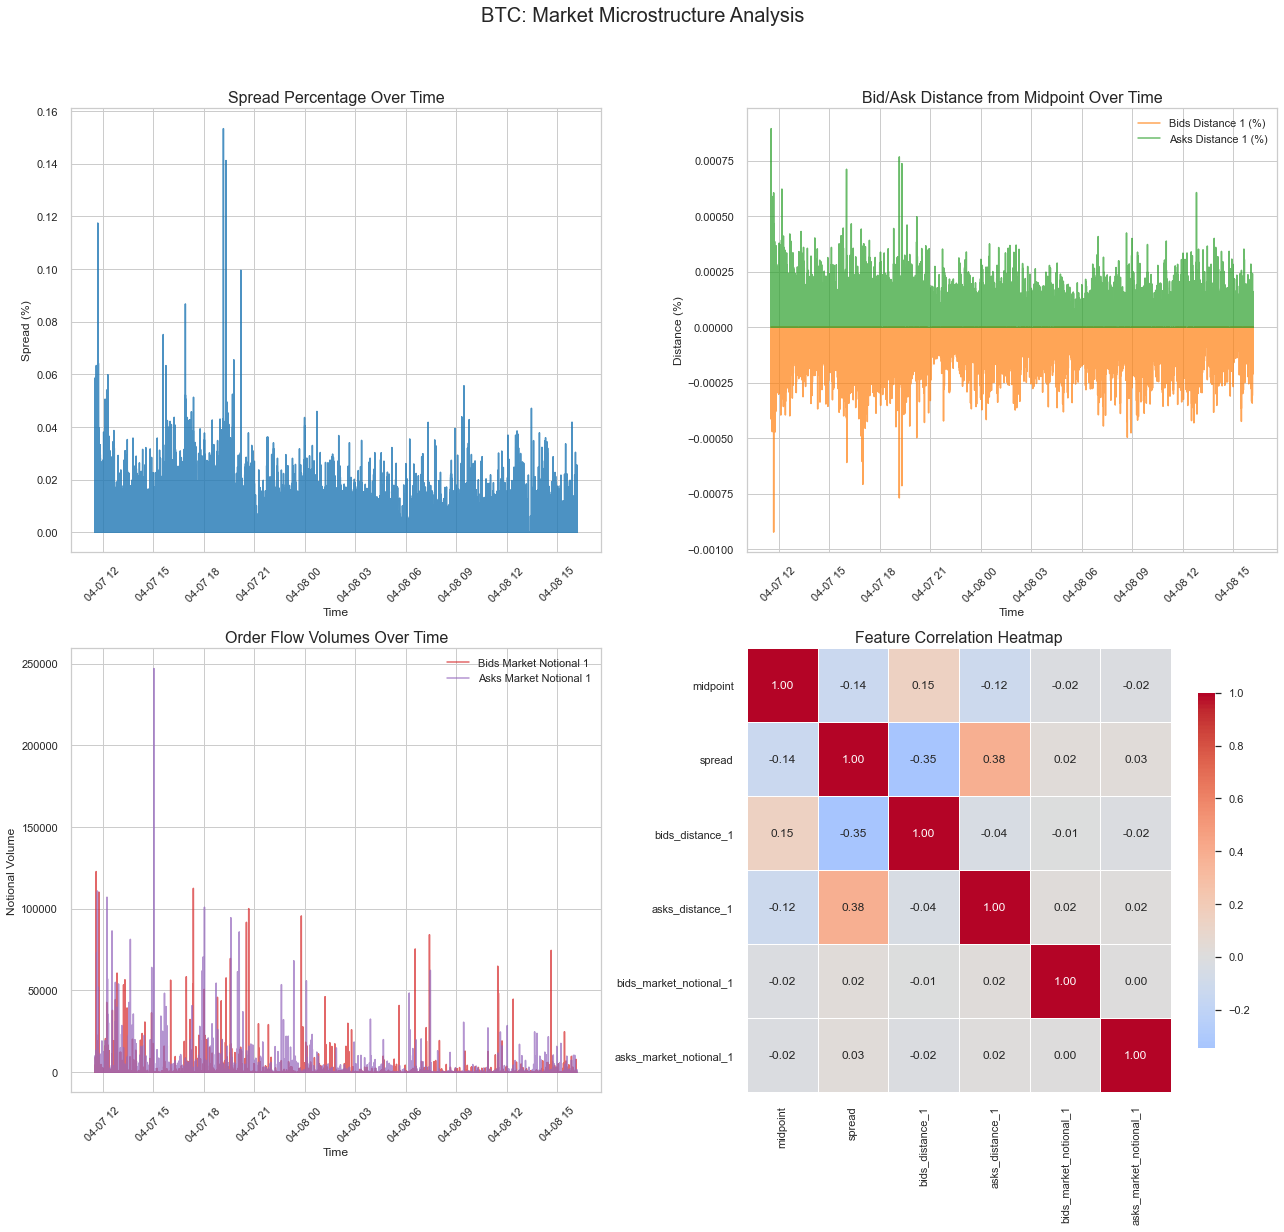

--- Summary Statistics for BTC ---
            midpoint         spread  spread_percentage  bids_distance_1  \
count  103072.000000  103072.000000      103072.000000     1.030720e+05   
mean    56643.860952       0.932915           0.001653    -4.778133e-05   
std       496.409416       2.769719           0.004915     5.698182e-05   
min     55401.995000       0.010000           0.000017    -9.228255e-04   
25%     56301.615000       0.010000           0.000018    -7.382790e-05   
50%     56572.192500       0.010000           0.000018    -2.717694e-05   
75%     56930.885000       0.010000           0.000018    -3.435585e-06   
max     57967.905000      85.180000           0.153319    -2.587986e-07   

       asks_distance_1  bids_market_notional_1  asks_market_notional_1  
count     1.030720e+05           103072.000000           103072.000000  
mean      4.219413e-05               47.308864               78.358808  
std       5.206392e-05             1332.842362             1607.378192

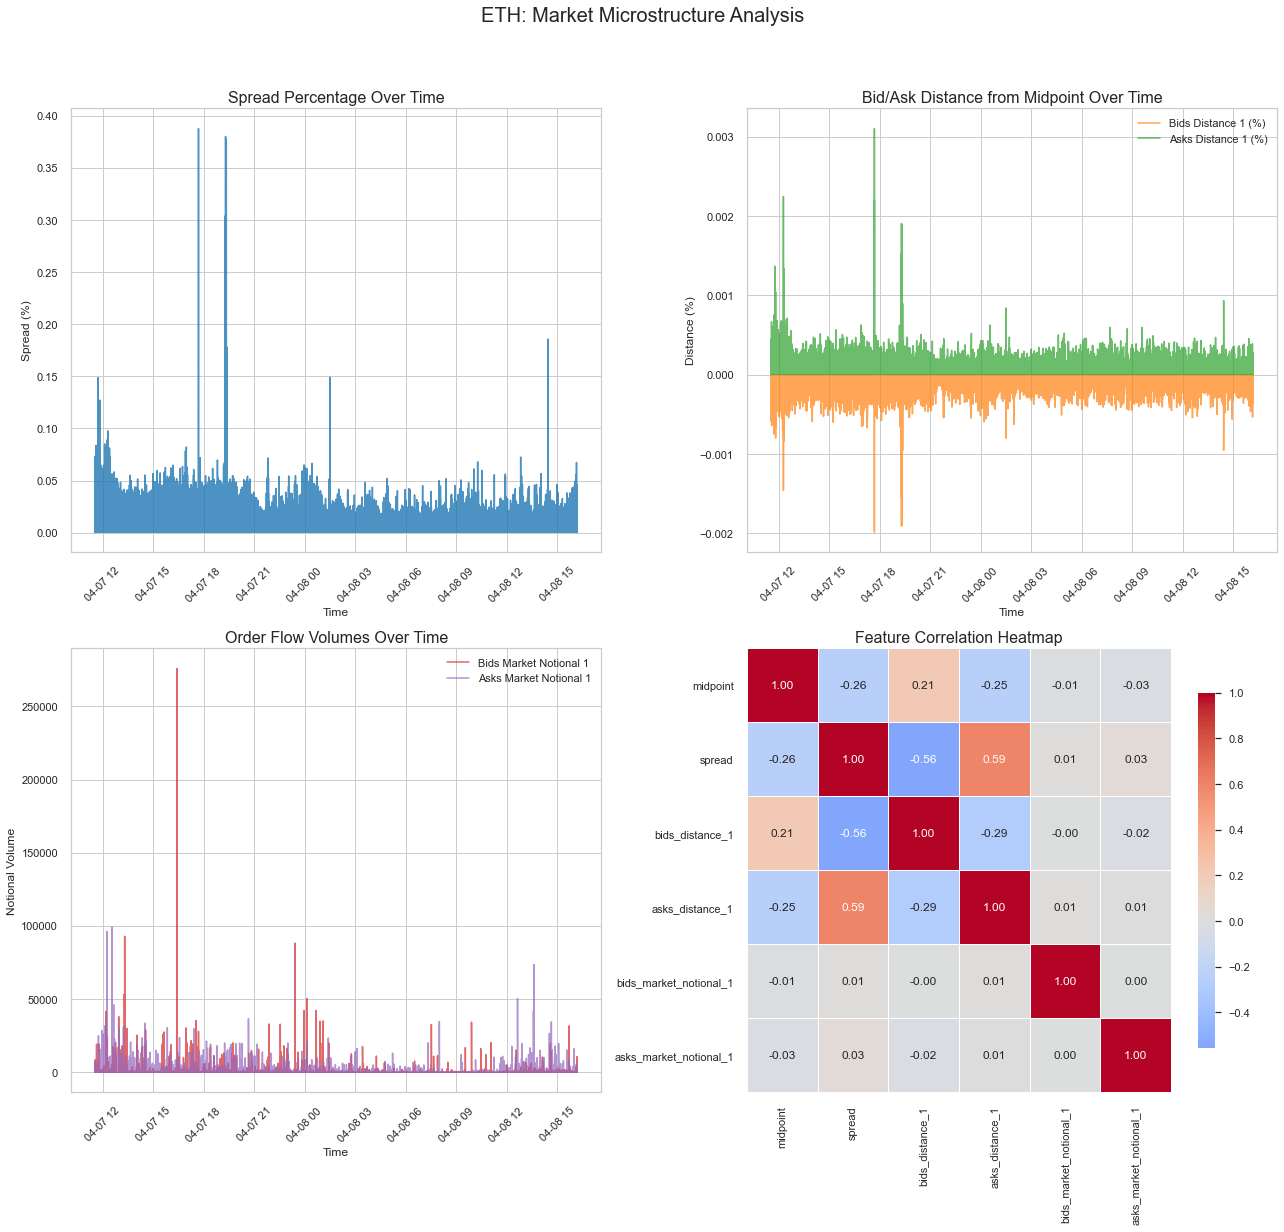

--- Summary Statistics for ETH ---
            midpoint         spread  spread_percentage  bids_distance_1  \
count  103077.000000  103077.000000      103077.000000    103077.000000   
mean     2000.082808       0.154924           0.007778        -0.000082   
std        22.858127       0.210138           0.010604         0.000075   
min      1930.395000       0.010000           0.000482        -0.001983   
25%      1985.175000       0.010000           0.000499        -0.000113   
50%      1997.715000       0.010000           0.000508        -0.000069   
75%      2015.705000       0.270000           0.013370        -0.000023   
max      2074.730000       7.650000           0.387529        -0.000007   

       asks_distance_1  bids_market_notional_1  asks_market_notional_1  
count    103077.000000           103077.000000           103077.000000  
mean          0.000075               31.853708               62.625145  
std           0.000075             1166.423172              902.397140

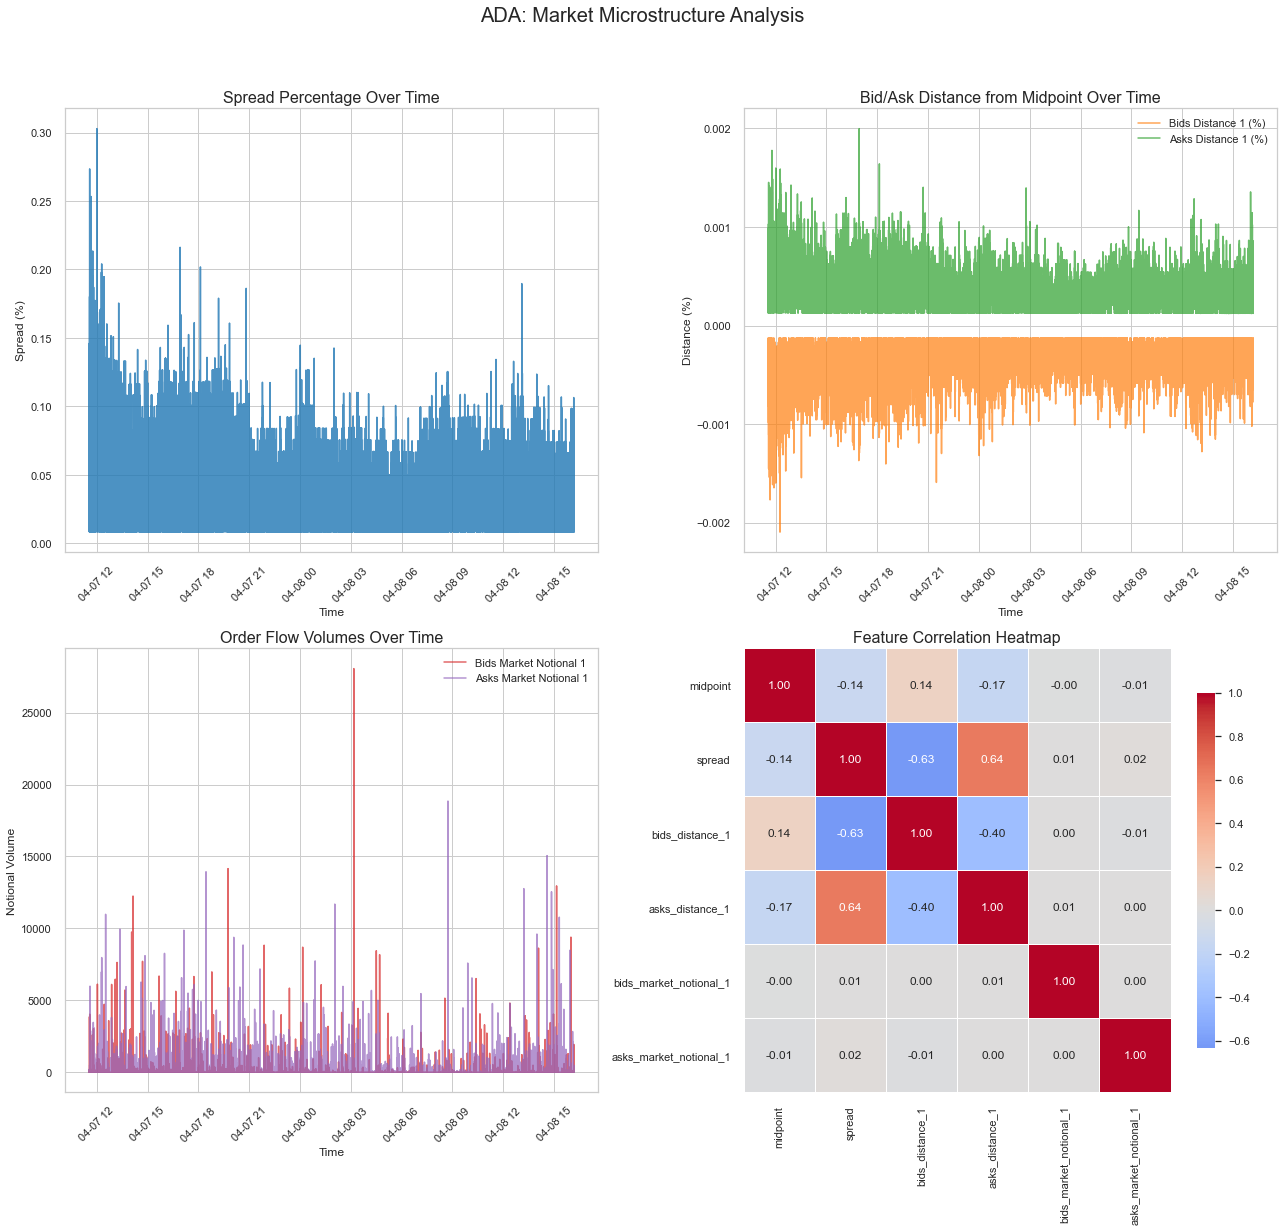

--- Summary Statistics for ADA ---
            midpoint         spread  spread_percentage  bids_distance_1  \
count  103053.000000  103053.000000      103053.000000    103053.000000   
mean        1.193186       0.000514           0.043144        -0.000359   
std         0.010811       0.000272           0.022864         0.000138   
min         1.160300       0.000100           0.008178        -0.002096   
25%         1.185550       0.000300           0.025330        -0.000420   
50%         1.191750       0.000500           0.041969        -0.000336   
75%         1.200050       0.000700           0.058127        -0.000288   
max         1.223650       0.003600           0.302903        -0.000123   

       asks_distance_1  bids_market_notional_1  asks_market_notional_1  
count    103053.000000           103053.000000           103053.000000  
mean          0.000358                6.659533               17.926137  
std           0.000139              183.534411              229.711236

In [21]:

crypto_dfs = {"BTC": btc_combined, "ETH": eth_combined, "ADA": ada_combined}


sns.set(style="whitegrid", palette="muted")


def analyze_market_microstructure(df, crypto_name):
    print(f"Analyzing market microstructure for {crypto_name}...\n")
    
    
    df['spread_percentage'] = (df['spread'] / df['midpoint']) * 100
    
    
    fig, axs = plt.subplots(2, 2, figsize=(18, 18))
    fig.suptitle(f"{crypto_name}: Market Microstructure Analysis", fontsize=20)

    axs[0, 0].plot(df['system_time'], df['spread_percentage'], label="Spread (%)", color='tab:blue', alpha=0.8)
    axs[0, 0].set_title("Spread Percentage Over Time", fontsize=16)
    axs[0, 0].set_xlabel("Time", fontsize=12)
    axs[0, 0].set_ylabel("Spread (%)", fontsize=12)
    axs[0, 0].grid(True)
    axs[0, 0].tick_params(axis='x', rotation=45)

    corr_matrix = df[['midpoint', 'spread', 'bids_distance_1', 'asks_distance_1',
                      'bids_market_notional_1', 'asks_market_notional_1']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5,
                cbar_kws={"shrink": 0.8}, ax=axs[1, 1])
    axs[1, 1].set_title("Feature Correlation Heatmap", fontsize=16)

    axs[0, 1].plot(df['system_time'], df['bids_distance_1'], label="Bids Distance 1 (%)", alpha=0.7, color='tab:orange')
    axs[0, 1].plot(df['system_time'], df['asks_distance_1'], label="Asks Distance 1 (%)", alpha=0.7, color='tab:green')
    axs[0, 1].set_title("Bid/Ask Distance from Midpoint Over Time", fontsize=16)
    axs[0, 1].set_xlabel("Time", fontsize=12)
    axs[0, 1].set_ylabel("Distance (%)", fontsize=12)
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    axs[0, 1].tick_params(axis='x', rotation=45)

    axs[1, 0].plot(df['system_time'], df['bids_market_notional_1'], label="Bids Market Notional 1", alpha=0.7, color='tab:red')
    axs[1, 0].plot(df['system_time'], df['asks_market_notional_1'], label="Asks Market Notional 1", alpha=0.7, color='tab:purple')
    axs[1, 0].set_title("Order Flow Volumes Over Time", fontsize=16)
    axs[1, 0].set_xlabel("Time", fontsize=12)
    axs[1, 0].set_ylabel("Notional Volume", fontsize=12)
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    axs[1, 0].tick_params(axis='x', rotation=45)


    

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

    print(f"--- Summary Statistics for {crypto_name} ---")
    summary_stats = df[['midpoint', 'spread', 'spread_percentage', 'bids_distance_1', 
                        'asks_distance_1', 'bids_market_notional_1', 'asks_market_notional_1']].describe()
    print(summary_stats)

for crypto_name, df in crypto_dfs.items():
    df['system_time'] = pd.to_datetime(df['system_time'])  # Ensure system_time is datetime
    analyze_market_microstructure(df, crypto_name)



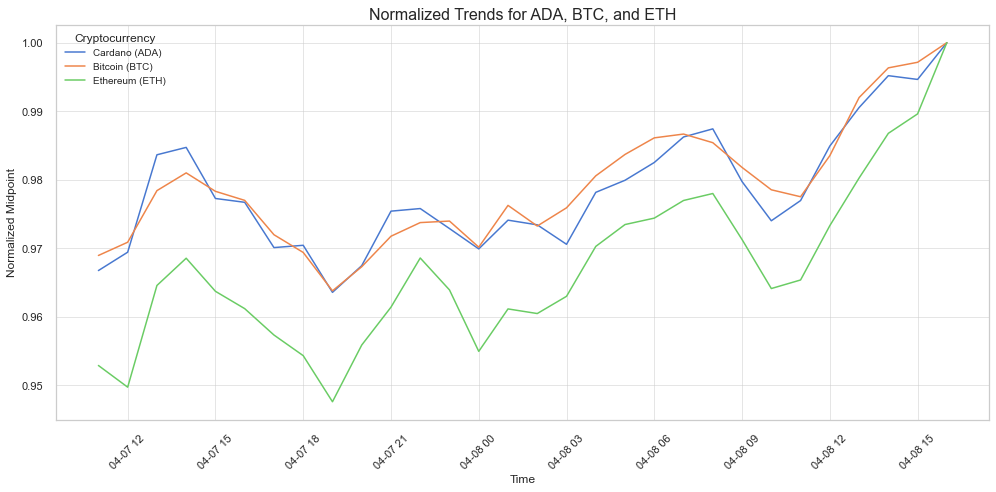

In [22]:
def process_dataframe(df, label):
    df['system_time'] = pd.to_datetime(df['system_time'])  
    df.set_index('system_time', inplace=True)  
    resampled_df = df['midpoint'].resample('H').mean()  
    normalized_df = resampled_df / resampled_df.max() 
    return normalized_df, label

# Process and normalize the dataframes
ada_midpoint, ada_label = process_dataframe(ada_combined.copy(deep=True), 'Cardano (ADA)')
btc_midpoint, btc_label = process_dataframe(btc_combined.copy(deep=True), 'Bitcoin (BTC)')
eth_midpoint, eth_label = process_dataframe(eth_combined.copy(deep=True), 'Ethereum (ETH)')


plt.figure(figsize=(14, 7))


plt.plot(ada_midpoint.index, ada_midpoint, label=ada_label, linestyle='-', marker=None)
plt.plot(btc_midpoint.index, btc_midpoint, label=btc_label, linestyle='-', marker=None)
plt.plot(eth_midpoint.index, eth_midpoint, label=eth_label, linestyle='-', marker=None)

plt.title("Normalized Trends for ADA, BTC, and ETH", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Normalized Midpoint", fontsize=12)
plt.grid(alpha=0.5)
plt.legend(title="Cryptocurrency", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [23]:
df_fees = pd.read_excel("data/Decentralized/Fees_.xlsx" )
    
df_fees['Date'] = pd.to_datetime(df_fees['Date']).dt.date
df_fees["ETH(Wei)"] = df_fees["ETH(Wei)"].astype(float)
df_fees["BTC(satoshi/byte)"] = df_fees["BTC(satoshi/byte)"].str.replace(",", ".").astype(float)
df_fees["Cardano(ADA)"] = df_fees["Cardano(ADA)"].str.replace(",", ".").astype(float)



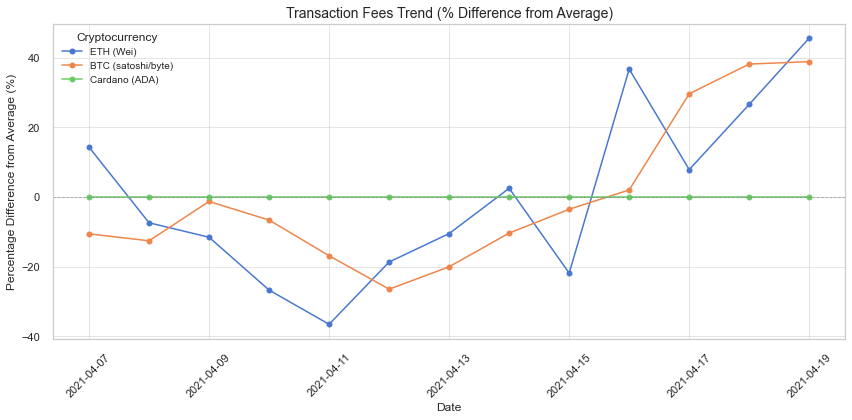

In [24]:
avg_eth = df_fees["ETH(Wei)"].mean()
avg_btc = df_fees["BTC(satoshi/byte)"].mean()
avg_ada = df_fees["Cardano(ADA)"].mean()

df_fees["ETH(Wei) %"] = (df_fees["ETH(Wei)"] - avg_eth) / avg_eth * 100
df_fees["BTC(satoshi/byte) %"] = (df_fees["BTC(satoshi/byte)"] - avg_btc) / avg_btc * 100
df_fees["Cardano(ADA) %"] = (df_fees["Cardano(ADA)"] - avg_ada) / avg_ada * 100

plt.figure(figsize=(12, 6))

plt.plot(df_fees['Date'], df_fees["ETH(Wei) %"], label='ETH (Wei)', marker='o', linestyle='-')
plt.plot(df_fees['Date'], df_fees["BTC(satoshi/byte) %"], label='BTC (satoshi/byte)', marker='o', linestyle='-')
plt.plot(df_fees['Date'], df_fees["Cardano(ADA) %"], label='Cardano (ADA)', marker='o', linestyle='-')

plt.title("Transaction Fees Trend (% Difference from Average)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Percentage Difference from Average (%)", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)  
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend(title="Cryptocurrency", fontsize=10)
plt.tight_layout()

plt.show()

In [25]:
def calculate_imbalance(row):
    bid_notional = row["bids_market_notional_1"]
    ask_notional = row["asks_market_notional_1"]
    if bid_notional + ask_notional == 0:
        return 0
    return (bid_notional - ask_notional) / (bid_notional + ask_notional)

def generate_signals_with_weights(
    data,
    imbalance_threshold,
    momentum_period,
    momentum_threshold,
    mean_reversion_short,
    mean_reversion_long,
    mean_reversion_threshold,
    weights,
):
    """
    Generate signals using weighted combination of imbalance, momentum, and mean reversion signals.
    """
    weight_imbalance, weight_momentum, weight_mean_reversion = weights

    # Imbalance signals
    data['imbalance'] = data.apply(calculate_imbalance, axis=1)
    data['imbalance_signal'] = 0
    data.loc[data['imbalance'] > imbalance_threshold, 'imbalance_signal'] = 1
    data.loc[data['imbalance'] < -imbalance_threshold, 'imbalance_signal'] = -1

    # Momentum signals
    data["momentum"] = data["midpoint"].pct_change(momentum_period)  # Changed to percentage change
    data["momentum_signal"] = 0
    data.loc[data["momentum"] > momentum_threshold, "momentum_signal"] = 1
    data.loc[data["momentum"] < -momentum_threshold, "momentum_signal"] = -1

    # Mean reversion signals
    data["short_ma"] = data["midpoint"].rolling(window=mean_reversion_short).mean()
    data["long_ma"] = data["midpoint"].rolling(window=mean_reversion_long).mean()
    data["deviation"] = (data["short_ma"] - data["long_ma"]) / data["long_ma"]
    data["mean_reversion_signal"] = 0
    data.loc[data["deviation"] > mean_reversion_threshold, "mean_reversion_signal"] = -1
    data.loc[data["deviation"] < -mean_reversion_threshold, "mean_reversion_signal"] = 1

    # Combine signals using weights
    data["combined_signal"] = (
        weight_imbalance * data["imbalance_signal"]
        + weight_momentum * data["momentum_signal"]
        + weight_mean_reversion * data["mean_reversion_signal"]
    )
    
    # Convert combined signal to trading signals
    data["trading_signal"] = 0
    data.loc[data["combined_signal"] >= 0.5, "trading_signal"] = 1
    data.loc[data["combined_signal"] <= -0.5, "trading_signal"] = -1
    
    return data


def calculate_fees(cryptoname, dffees, _trade_date):
    
    if cryptoname == 'BTC':
        fee_row = dffees[dffees['Date'] == _trade_date]

        if fee_row.empty:
            print("(BTC) Fee not found for the date ", str(_trade_date))
            return 0

        btc_fee_satoshi_per_byte = fee_row['BTC(satoshi/byte)'].values[0]
        fees = 258 * btc_fee_satoshi_per_byte * 10**-8

    if cryptoname == 'ETH':
        fee_row = dffees[dffees['Date'] == _trade_date]

        if fee_row.empty:
            print("(ETH) Fee not found for the date ", str(_trade_date))
            return 0

        wei_price_on_that_day = fee_row['ETH(Wei)'].values[0]
        fees = wei_price_on_that_day * 21000 * 10**-18

    else: 
        fee_row = dffees[dffees['Date'] == _trade_date]

        if fee_row.empty:
            print("(ADA) Fee not found for the date ", str(_trade_date))
            return 0

        
        fees = fee_row['Cardano(ADA)'].values[0]

    return fees

def backtest_strategy(data, signal_column, holding_period=1, initial_balance=10000, transaction_cost=0.001, slippage=0.0001, cryptoname="", dffees = df_fees):
    """
    Backtest a trading strategy with holding periods, transaction costs, and slippage.
    Transaction cost is a percentage of the trade value (e.g., 0.001 = 0.1%)
    Slippage is a percentage of the trade price (e.g., 0.0001 = 0.01%)
    """
    balance = initial_balance
    position = 0
    last_price = None
    trade_log = []
    holding_counter = 0

    for i, row in data.iterrows():
        price = row["midpoint"]
        signal = row[signal_column]

        
        if holding_counter > 0:
            holding_counter -= 1
            if holding_counter == 0 and position > 0:  # Force sell at end of holding period
                effective_sell_price = price * (1 - slippage)  # Include slippage for selling
    
                fees = calculate_fees(cryptoname, dffees, row['trade_date'])

                balance = position * effective_sell_price * (1 - transaction_cost) - fees
                position = 0
                trade_log.append({
                    "action": "sell",
                    "price": price,
                    "effective_price": effective_sell_price,
                    "balance": balance
                })
                continue

        if signal == 1 and balance > 0 and holding_counter == 0:  # Buy
            effective_buy_price = price * (1 + slippage)  # Include slippage for buying
            fees = calculate_fees(cryptoname, dffees, row['trade_date'])
            position = (balance * (1 - transaction_cost) - fees) / effective_buy_price
            balance = 0
            holding_counter = holding_period
            trade_log.append({
                "action": "buy",
                "price": price,
                "effective_price": effective_buy_price,
                "position": position
            })

        elif signal == -1 and position > 0:  # Sell
            effective_sell_price = price * (1 - slippage)  # Include slippage for selling
            fees = calculate_fees(cryptoname, dffees, row['trade_date'])
            balance = position * effective_sell_price * (1 - transaction_cost) - fees
            position = 0
            holding_counter = 0
            trade_log.append({
                "action": "sell",
                "price": price,
                "effective_price": effective_sell_price,
                "balance": balance
            })

    # Close any remaining position
    if position > 0:
        effective_sell_price = price * (1 - slippage)  # Include slippage for final sell
        fees = calculate_fees(cryptoname, dffees, row['trade_date'])
        balance = position * effective_sell_price * (1 - transaction_cost) - fees
        trade_log.append({
            "action": "final_sell",
            "price": price,
            "effective_price": effective_sell_price,
            "balance": balance
        })

    return balance, trade_log






<ipython-input-26-b7cd7e08590e>:101: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


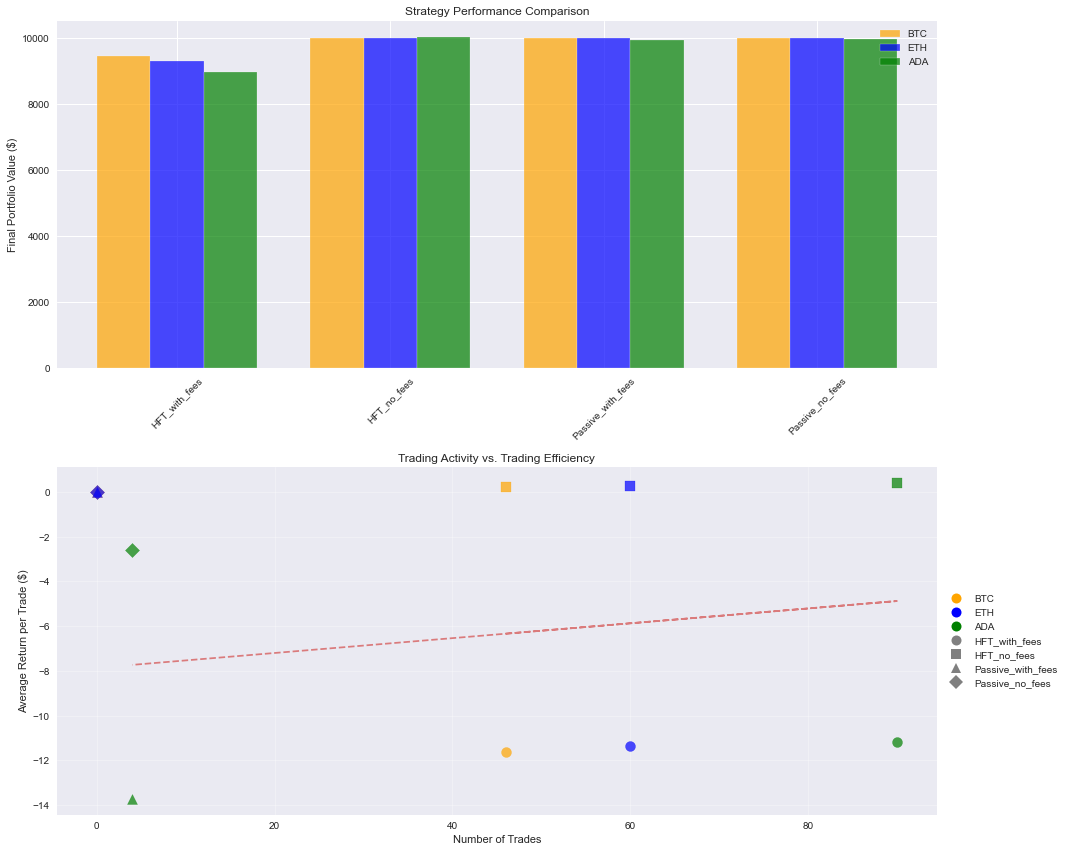


Detailed Performance Statistics:
--------------------------------------------------

BTC Results:
--------------------

HFT_with_fees:
Final Value: $9464.39
Return: -5.36%
Number of Trades: 46
Average Return per Trade: $-11.64

HFT_no_fees:
Final Value: $10009.51
Return: 0.10%
Number of Trades: 46
Average Return per Trade: $0.21

Passive_with_fees:
Final Value: $10000.00
Return: 0.00%
Number of Trades: 0

Passive_no_fees:
Final Value: $10000.00
Return: 0.00%
Number of Trades: 0

ETH Results:
--------------------

HFT_with_fees:
Final Value: $9319.40
Return: -6.81%
Number of Trades: 60
Average Return per Trade: $-11.34

HFT_no_fees:
Final Value: $10015.63
Return: 0.16%
Number of Trades: 60
Average Return per Trade: $0.26

Passive_with_fees:
Final Value: $10000.00
Return: 0.00%
Number of Trades: 0

Passive_no_fees:
Final Value: $10000.00
Return: 0.00%
Number of Trades: 0

ADA Results:
--------------------

HFT_with_fees:
Final Value: $8993.42
Return: -10.07%
Number of Trades: 90
Average

In [26]:
def run_strategy_comparison(crypto_df, crypto_name, initial_balance=10000):
    """
    Run both HFT and passive strategies with and without costs (transaction costs and slippage)
    """
    results = {}
    
    # HFT Strategy Parameters
    weights_hft = (0.4, 0.3, 0.3)
    hft_params = {
        'imbalance_threshold': 0.1,
        'momentum_period': 10,
        'momentum_threshold': 0.001,
        'mean_reversion_short': 10,
        'mean_reversion_long': 40,
        'mean_reversion_threshold': 0.002,
        'holding_period': 3
    }
    
    # Passive Strategy Parameters
    weights_passive = (0.2, 0.4, 0.4)
    passive_params = {
        'imbalance_threshold': 0.3,
        'momentum_period': 20,
        'momentum_threshold': 0.005,
        'mean_reversion_short': 50,
        'mean_reversion_long': 200,
        'mean_reversion_threshold': 0.005,
        'holding_period': 20
    }
    
   
    df_hft = generate_signals_with_weights(
        crypto_df.copy(),
        weights=weights_hft,
        **{k: v for k, v in hft_params.items() if k != 'holding_period'}
    )
    
    
    final_value_hft_with_costs, trades_hft_with = backtest_strategy(
        df_hft,
        signal_column="trading_signal",
        holding_period=hft_params['holding_period'],
        transaction_cost=0.001,
        slippage=0.0002,  # Higher slippage for HFT
        cryptoname = crypto_name,
        dffees = df_fees
    )

    df_fees_empty = df_fees.applymap(lambda x: 0 if isinstance(x, float) or isinstance(x, int) else x)
    final_value_hft_no_costs, trades_hft_without = backtest_strategy(
        df_hft,
        signal_column="trading_signal",
        holding_period=hft_params['holding_period'],
        transaction_cost=0,
        slippage=0,
        cryptoname = crypto_name,
        dffees = df_fees_empty
    )
    
    
    df_passive = generate_signals_with_weights(
        crypto_df.copy(),
        weights=weights_passive,
        **{k: v for k, v in passive_params.items() if k != 'holding_period'}
    )
    
    
    final_value_passive_with_costs, trades_passive_with = backtest_strategy(
        df_passive,
        signal_column="trading_signal",
        holding_period=passive_params['holding_period'],
        transaction_cost=0.001,
        slippage=0.0001,  # Lower slippage for passive
        cryptoname = crypto_name,
        dffees = df_fees
    )
    
    final_value_passive_no_costs, trades_passive_without = backtest_strategy(
        df_passive,
        signal_column="trading_signal",
        holding_period=passive_params['holding_period'],
        transaction_cost=0,
        slippage=0,
        cryptoname = crypto_name,
        dffees = df_fees_empty
    )
    
    return {
        'HFT_with_fees': (final_value_hft_with_costs, len(trades_hft_with)),
        'HFT_no_fees': (final_value_hft_no_costs, len(trades_hft_without)),
        'Passive_with_fees': (final_value_passive_with_costs, len(trades_passive_with)),
        'Passive_no_fees': (final_value_passive_no_costs, len(trades_passive_without))
    }

results = {
    'BTC': run_strategy_comparison(btc_combined, 'BTC'),
    'ETH': run_strategy_comparison(eth_combined, 'ETH'),
    'ADA': run_strategy_comparison(ada_combined, 'ADA')
}

plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

final_values = {
    'BTC': [],
    'ETH': [],
    'ADA': []
}

strategies = ['HFT_with_fees', 'HFT_no_fees', 'Passive_with_fees', 'Passive_no_fees']

for crypto in results:
    for strategy in strategies:
        final_values[crypto].append(results[crypto][strategy][0])

x = np.arange(len(strategies))
width = 0.25

ax1.bar(x - width, final_values['BTC'], width, label='BTC', color='orange', alpha=0.7)
ax1.bar(x, final_values['ETH'], width, label='ETH', color='blue', alpha=0.7)
ax1.bar(x + width, final_values['ADA'], width, label='ADA', color='green', alpha=0.7)

ax1.set_ylabel('Final Portfolio Value ($)')
ax1.set_title('Strategy Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(strategies, rotation=45)
ax1.legend()

trade_metrics = {
    'BTC': {'trades': [], 'avg_returns': []},
    'ETH': {'trades': [], 'avg_returns': []},
    'ADA': {'trades': [], 'avg_returns': []}
}

for crypto in results:
    for strategy in strategies:
        final_value, num_trades = results[crypto][strategy]
        
        if num_trades > 0:
            avg_return = (final_value - 10000) / num_trades
        else:
            avg_return = 0
            
        trade_metrics[crypto]['trades'].append(num_trades)
        trade_metrics[crypto]['avg_returns'].append(avg_return)

colors = {'BTC': 'orange', 'ETH': 'blue', 'ADA': 'green'}
markers = {'HFT_with_fees': 'o', 'HFT_no_fees': 's', 
           'Passive_with_fees': '^', 'Passive_no_fees': 'D'}

for crypto in trade_metrics:
    for i, strategy in enumerate(strategies):
        ax2.scatter(trade_metrics[crypto]['trades'][i], 
                   trade_metrics[crypto]['avg_returns'][i],
                   color=colors[crypto],
                   marker=markers[strategy],
                   s=100,
                   label=f'{crypto}-{strategy}',
                   alpha=0.7)

all_trades = []
all_returns = []
for crypto in trade_metrics:
    all_trades.extend(trade_metrics[crypto]['trades'])
    all_returns.extend(trade_metrics[crypto]['avg_returns'])

valid_points = [(t, r) for t, r in zip(all_trades, all_returns) if t > 0]
if valid_points:
    trades_array = np.array([p[0] for p in valid_points])
    returns_array = np.array([p[1] for p in valid_points])
    z = np.polyfit(trades_array, returns_array, 1)
    p = np.poly1d(z)
    ax2.plot(trades_array, p(trades_array), "r--", alpha=0.8, label="Trend Line")

ax2.set_xlabel('Number of Trades')
ax2.set_ylabel('Average Return per Trade ($)')
ax2.set_title('Trading Activity vs. Trading Efficiency')
ax2.grid(True, alpha=0.3)

legend_elements = []
for crypto, color in colors.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                    markerfacecolor=color, markersize=10,
                                    label=crypto))
for strategy, marker in markers.items():
    legend_elements.append(plt.Line2D([0], [0], marker=marker, color='gray',
                                    linestyle='None', markersize=10,
                                    label=strategy))

ax2.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

print("\nDetailed Performance Statistics:")
print("-" * 50)
for crypto in results:
    print(f"\n{crypto} Results:")
    print("-" * 20)
    for strategy in strategies:
        final_value, num_trades = results[crypto][strategy]
        returns = ((final_value - 10000) / 10000) * 100
        print(f"\n{strategy}:")
        print(f"Final Value: ${final_value:.2f}")
        print(f"Return: {returns:.2f}%")
        print(f"Number of Trades: {num_trades}")
        if num_trades > 0:
            print(f"Average Return per Trade: ${(final_value - 10000)/num_trades:.2f}")

Epps effect

Analyzing Epps Effect...
Calculating correlations for BTC-ETH...
Calculating correlations for BTC-ADA...
Calculating correlations for ETH-ADA...

Epps Effect Analysis for BTC-ETH
----------------------------------------
Power Law Exponent: 0.126
R-squared: 0.692
Correlation Range: 0.243 to 0.877

Epps Effect Analysis for BTC-ADA
----------------------------------------
Power Law Exponent: 0.128
R-squared: 0.691
Correlation Range: 0.213 to 0.801

Epps Effect Analysis for ETH-ADA
----------------------------------------
Power Law Exponent: 0.122
R-squared: 0.729
Correlation Range: 0.235 to 0.836


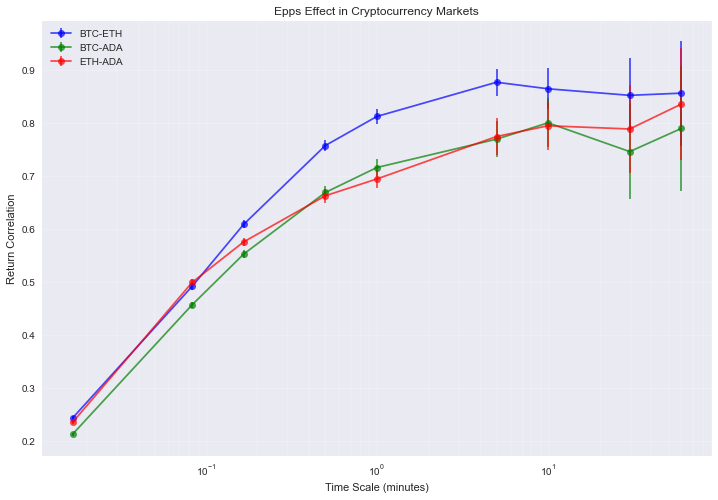


Analyzing Intraday Patterns...


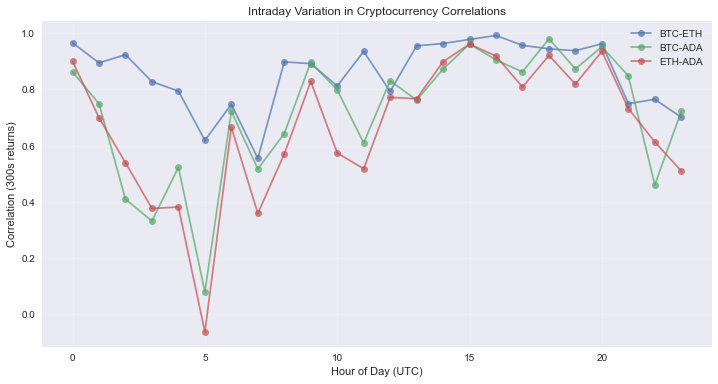


Intraday Statistics for BTC-ETH
----------------------------------------
Mean Correlation: 0.856
Std Deviation: 0.118
Min Correlation: 0.554
Max Correlation: 0.992

Intraday Statistics for BTC-ADA
----------------------------------------
Mean Correlation: 0.715
Std Deviation: 0.223
Min Correlation: 0.079
Max Correlation: 0.980

Intraday Statistics for ETH-ADA
----------------------------------------
Mean Correlation: 0.666
Std Deviation: 0.239
Min Correlation: -0.063
Max Correlation: 0.961


In [27]:
def prepare_data_for_epps(df):
    """
    Prepare DataFrame for Epps effect analysis by properly setting the datetime index
    """
    df = df.copy()
    if 'system_time' in df.columns:
        df['system_time'] = pd.to_datetime(df['system_time'])
        df.set_index('system_time', inplace=True)
    return df

def calculate_epps_effect(df1, df2, time_scales):
    """
    Calculate correlation coefficients between two assets at different time scales
    
    Parameters:
    -----------
    df1, df2: DataFrames containing price data for two assets
    time_scales: Array of time aggregation periods (in seconds)
    
    Returns:
    --------
    correlations: Array of correlation coefficients for each time scale
    std_errors: Array of standard errors for the correlations
    """
    df1 = prepare_data_for_epps(df1)
    df2 = prepare_data_for_epps(df2)
    
    correlations = []
    std_errors = []
    
    for scale in time_scales:
        df1_resampled = df1['midpoint'].resample(f'{scale}S').last()
        df2_resampled = df2['midpoint'].resample(f'{scale}S').last()
        
        returns1 = df1_resampled.pct_change().dropna()
        returns2 = df2_resampled.pct_change().dropna()
        
        returns1, returns2 = returns1.align(returns2, join='inner')
        
        if len(returns1) > 1: 
            
            correlation = returns1.corr(returns2)
            n = len(returns1)
            std_error = np.sqrt((1 - correlation**2) / (n - 2))
        else:
            correlation = np.nan
            std_error = np.nan
        
        correlations.append(correlation)
        std_errors.append(std_error)
    
    return np.array(correlations), np.array(std_errors)

def analyze_epps_effect(btc_df, eth_df, ada_df):
    """
    Analyze and visualize the Epps effect between cryptocurrency pairs
    """
    time_scales = np.array([1, 5, 10, 30, 60, 300, 600, 1800, 3600])
    
    pairs = {
        'BTC-ETH': (btc_df, eth_df),
        'BTC-ADA': (btc_df, ada_df),
        'ETH-ADA': (eth_df, ada_df)
    }
    
    results = {}
    for pair_name, (df1, df2) in pairs.items():
        print(f"Calculating correlations for {pair_name}...")
        correlations, std_errors = calculate_epps_effect(df1, df2, time_scales)
        results[pair_name] = {
            'correlations': correlations,
            'std_errors': std_errors
        }
    
    plt.figure(figsize=(12, 8))
    colors = {'BTC-ETH': 'blue', 'BTC-ADA': 'green', 'ETH-ADA': 'red'}
    
    for pair_name, result in results.items():
        mask = ~np.isnan(result['correlations'])  # Remove NaN values for plotting
        plt.errorbar(time_scales[mask]/60, result['correlations'][mask], 
                    yerr=result['std_errors'][mask], 
                    fmt='o-', 
                    label=pair_name,
                    color=colors[pair_name],
                    capsize=5,
                    alpha=0.7)
    
    plt.xscale('log')
    plt.xlabel('Time Scale (minutes)')
    plt.ylabel('Return Correlation')
    plt.title('Epps Effect in Cryptocurrency Markets')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()
    
    # Fit power law to characterize the Epps effect
    for pair_name, result in results.items():
        mask = ~np.isnan(result['correlations'])
        if np.any(mask):  # Only fit if we have valid data
            # Fit power law: correlation = a * (time_scale)^b
            log_time = np.log(time_scales[mask])
            log_corr = np.log(np.abs(result['correlations'][mask]))
            slope, intercept, r_value, p_value, std_err = stats.linregress(log_time, log_corr)
            
            print(f"\nEpps Effect Analysis for {pair_name}")
            print("-" * 40)
            print(f"Power Law Exponent: {slope:.3f}")
            print(f"R-squared: {r_value**2:.3f}")
            print(f"Correlation Range: {np.min(result['correlations'][mask]):.3f} to {np.max(result['correlations'][mask]):.3f}")
    
    plt.show()
    
    return results

def analyze_intraday_epps(btc_df, eth_df, ada_df, time_scale=300): 
    """
    Analyze how the Epps effect varies throughout the trading day
    """
    btc_df = prepare_data_for_epps(btc_df)
    eth_df = prepare_data_for_epps(eth_df)
    ada_df = prepare_data_for_epps(ada_df)
    
    hours = np.arange(24)
    
    intraday_correlations = {
        'BTC-ETH': np.zeros(24),
        'BTC-ADA': np.zeros(24),
        'ETH-ADA': np.zeros(24)
    }
    
    for hour in hours:
        btc_hour = btc_df[btc_df.index.hour == hour]
        eth_hour = eth_df[eth_df.index.hour == hour]
        ada_hour = ada_df[ada_df.index.hour == hour]
        
        pairs = {
            'BTC-ETH': (btc_hour, eth_hour),
            'BTC-ADA': (btc_hour, ada_hour),
            'ETH-ADA': (eth_hour, ada_hour)
        }
        
        for pair_name, (df1, df2) in pairs.items():
            if not df1.empty and not df2.empty:
                corr, _ = calculate_epps_effect(df1, df2, [time_scale])
                intraday_correlations[pair_name][hour] = corr[0]
    
    plt.figure(figsize=(12, 6))
    
    for pair_name, correlations in intraday_correlations.items():
        plt.plot(hours, correlations, 'o-', label=pair_name, alpha=0.7)
    
    plt.xlabel('Hour of Day (UTC)')
    plt.ylabel(f'Correlation ({time_scale}s returns)')
    plt.title('Intraday Variation in Cryptocurrency Correlations')
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.show()
    
    return intraday_correlations

print("Analyzing Epps Effect...")
epps_results = analyze_epps_effect(btc_combined, eth_combined, ada_combined)

print("\nAnalyzing Intraday Patterns...")
intraday_results = analyze_intraday_epps(btc_combined, eth_combined, ada_combined)

for pair_name, correlations in intraday_results.items():
    valid_corrs = correlations[~np.isnan(correlations)]
    if len(valid_corrs) > 0:
        print(f"\nIntraday Statistics for {pair_name}")
        print("-" * 40)
        print(f"Mean Correlation: {np.mean(valid_corrs):.3f}")
        print(f"Std Deviation: {np.std(valid_corrs):.3f}")
        print(f"Min Correlation: {np.min(valid_corrs):.3f}")
        print(f"Max Correlation: {np.max(valid_corrs):.3f}")